# Analysis of Hotel Booking Data:

## Introduction and Objective:

    This project delves into the booking data of a city hotel and a resort hotel collected between 2015 and 2017 to identify the key factors contributing to high cancellation rates. The dataset encompasses a wide range of comprehensive booking details, including "Reservation_date","Length_of_stay","Room_Type","Stay_on_weekday_and_weekend","ADR","Guest Demographics (Adults, Children, Babies)" and other amenities like "Parking_Availability" etc.

    In recent years, both the City and Resort hotels have experienced a concerning surge in cancellation rate, negatively impacting revenue generation and leading to underutilized room capacity. By meticulously analyzing cancellation patterns and associated variables, this project aims to provide insights and recommendations to reduce cancellation, boost revenue and optimize hotel operations.

## Import Basic Libraries :

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)

## Loading Dataset:

In [3]:
booking_data = pd.read_csv('hotel_bookings.csv')
booking_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [4]:
booking_data.tail()

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
119385                       0                               0   
119386                       0                               0   
119387                       0                               0   
119388                       0                               0   
119389                       0                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
119385                  A                  A                0   No Deposit   
119386                  E                  E                0   No Deposit   
119387                  D                  D                0   No Deposit   
119388                  A                  A                0   No Deposit   
119389                  A                  A                0   No Deposit   

        agent  company  days_in_waiting_list customer_type     adr  \
119385  394.0      NaN                     0     Transient   96.14   
119386    9.0      NaN                     0     Transient  225.43   
119387    9.0      NaN                     0     Transient  157.71   
119388   89.0      NaN                     0     Transient  104.40   
119389    9.0      NaN                     0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

       reservation_status reservation_status_date  
119385          Check-Out              2017-09-06  
119386          Check-Out              2017-09-07  
119387          Check-Out              2017-09-07  
119388          Check-Out              2017-09-07  
119389          Check-Out              2017-09-07

In [5]:
booking_data.shape

(119390, 32)

In [6]:
booking_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Observations:**
- The given dataset contains 32 columns and 119390 rows.
- The dataset contains both numerical and categorical columns.
- Few columns "Country", "Agent","Children" and "Company" have missing values.
- Rest of the columns do not have any missing values.
- "Reservation_Status_Date" column in is 'Object' datatype. It is needed to convert in 'datetime' datatype.
- Similarly, "Children","Agent" and "Company" columns are in 'float' datatype and is neede to convert in 'integer' datatype.

## Data Cleaning:

## Imputing Missing Values:

In [8]:
# Check Columns with Missing Values
booking_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
# Check % of Missing Values in the Columns:
booking_data.isnull().sum()/len(booking_data)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

- As 'Company' column has 94% missing values, will drop this column.

In [10]:
booking_data = booking_data.drop('company',axis=1)

**Checking the values in Columns with missing value :**

In [11]:
booking_data['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [12]:
booking_data['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [13]:
booking_data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

**Observation :**
- Values in "Children" column represents no. of children. As the % of missing values in this column is only 0.03%, will impute this value with the mode of the column i.e. 0.0 .
- Will impute the missing values in "Country" column with 'Others'.
- Values of "Agent" column represents the agent_id. Here the 13% missing values will be imputed with 0.0 creating a new category in agent column.

In [14]:
booking_data['children'] = booking_data['children'].fillna(0.0)
booking_data['country'] = booking_data['country'].fillna('OTHERS')
booking_data['agent'] = booking_data['agent'].fillna(0.0)

In [15]:
# Checking to confirm no missing values
booking_data.isnull().sum().sum()

0

### Converting Datatypes of few columns:

In [16]:
booking_data['reservation_status_date'] = pd.to_datetime(booking_data['reservation_status_date'])
booking_data['children'] = booking_data['children'].astype('int64')
booking_data['agent'] = booking_data['agent'].astype('int64')

In [17]:
booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64  

## Creating a New Column:

- Here a new feature "Total_Guests" has been created by adding up the values of "Adults", "Children", "Babies".

In [18]:
booking_data['total_guests'] = booking_data['adults'] + booking_data['children'] + booking_data['babies']

In [19]:
booking_data['total_guests'].unique()

array([ 2,  1,  3,  4,  5, 12, 40, 26, 50, 27, 55,  0, 20,  6, 10],
      dtype=int64)

- Here it can be observed that the total_no_of guests is 0 for few of the observations.
- It is not a valid case and there must be some error in the data entry. So these observations with total_no_of_guests = 0 will be removed.

In [20]:
booking_data[booking_data['total_guests'] == 0].shape

(180, 32)

In [21]:
booking_data[booking_data['total_guests'] == 0]['is_canceled'].value_counts()

0    155
1     25
Name: is_canceled, dtype: int64

In [22]:
booking_data = booking_data.drop(booking_data[booking_data['total_guests'] == 0].index, axis=0)

In [23]:
booking_data.shape

(119210, 32)

## Statistical Summary:

### Numeric Columns:

In [24]:
booking_data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119210.000000  119210.000000      119210.000000   
mean        0.370766     104.109227        2016.156472   
std         0.483012     106.875450           0.707485   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     161.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119210.000000              119210.000000   
mean                  27.163376                  15.798717   
std                   13.601107                   8.781070   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119210.000000         119210.000000  119210.000000   
mean                  0.927053              2.499195       1.859206   
std                   0.995117              1.897106       0.575186   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119210.000000  119210.000000      119210.000000   
mean        0.104043       0.007961           0.031499   
std         0.398836       0.097509           0.174663   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119210.000000                   119210.000000   
mean                 0.087191                        0.137094   
std                  0.844918                        1.498137   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent  days_in_waiting_list            adr  \
count    119210.000000  119210.000000         119210.000000  119210.000000   
mean          0.218799      74.889078              2.321215     101.969092   
std           0.638504     107.168884             17.598002      50.434007   
min           0.000000       0.000000              0.000000      -6.380000   
25%           0.000000       7.000000              0.000000      69.500000   
50%           0.000000       9.000000              0.000000      94.950000   
75%           0.000000     152.000000              0.000000     126.000000   
max          18.000000     535.000000            391.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests   total_guests  
count                119210.000000              119210.000000  119210.000000  
mean                      0.062553                   0.571504       1.971210  
std                       0.245360                   0.792876       0.718876  
min                       0.000000                   0.000000       1.000000  
25%                       0.000000                   0.000000       2.000000  
5

**Observations :**
- In "adr" column the minimum value is -6 which is practically impossible.
- A lot of columns like "is_canceled","arrival_date_week_number" etc are actually categorical variable although their datatype is numerical.

### Categorical Columns:

In [25]:
booking_data.describe(include='O')

hotel arrival_date_month    meal country market_segment  \
count       119210             119210  119210  119210         119210   
unique           2                 12       5     178              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79163              13861   92236   48483          56408   

       distribution_channel reserved_room_type assigned_room_type  \
count                119210             119210             119210   
unique                    5                  9                 11   
top                   TA/TO                  A                  A   
freq                  97750              85873              74020   

       deposit_type customer_type reservation_status  
count        119210        119210             119210  
unique            3             4                  3  
top      No Deposit     Transient          Check-Out  
freq         104461         89476              75011

**Observation :**
- There are 11 **Categorical** columns in the dataset.
- Only 'hotel' column has binary classes. Rest of the object type column has multiple classes.
- It can be observed that no. ofbookings for "City Hotels" are more compared to "Resort Hotel" and month "August" is busier compared to others.
- Most of the tourists are from country "PRT".

## Outlier Treatment:

- As it was mentioned earlier the minimum value in "adr" column is -6 which is practically not valid, we will try to remove or impute such values.

In [27]:
def plot_box_plot(col):
    plt.figure(figsize=(6,4))
    sns.boxplot(y = col, data = booking_data)
    plt.title(col, fontdict={'fontsize':'x-large'})
    plt.show()

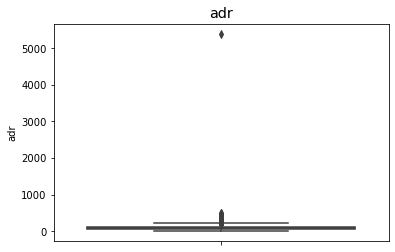

In [28]:
plot_box_plot('adr')

In [26]:
booking_data[booking_data['adr']<0].shape

(1, 32)

- As there is only one such value, it will be dropped.

In [27]:
booking_data = booking_data.drop(booking_data[booking_data['adr']<0].index, axis=0)

In [28]:
booking_data[booking_data['adr']==0].shape

(1810, 32)

- Although 'adr' = 0 is not a desired value for the business but it is not practically impossible. So we won't impute or remove these values.

In [29]:
booking_data['adr'].describe()

count    119209.000000
mean        101.970001
std          50.433242
min           0.000000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

## Exploratory Data Analysis (EDA) :

## Customer Demographic:

### Customers from different countries:

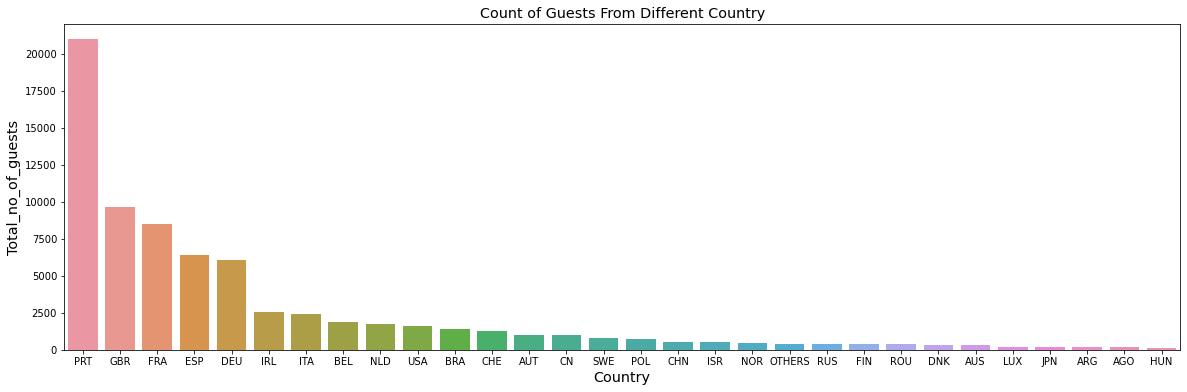

In [33]:
non_canceled_booking_country_wise = booking_data[booking_data['is_canceled']==0]['country'].value_counts().reset_index().rename(columns={"index": "Country", 'country': "Total_Guests"})
plt.figure(figsize=(20,6))
sns.barplot(x='Country', y='Total_Guests', data=non_canceled_booking_country_wise.iloc[:30])
plt.title('Count of Guests From Different Country',fontdict={'fontsize':'x-large'})
plt.xlabel('Country',fontdict={'fontsize':'x-large'})
plt.ylabel('Total_no_of_guests',fontdict={'fontsize':'x-large'})
plt.show()

In [36]:
import plotly.express as px
fig = px.bar(non_canceled_booking_country_wise[:30], x='Country', y='Total_Guests', title='Count of Guests From Different Country')
fig.show()

In [37]:
!pip install folium

  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


In [38]:
import folium

In [39]:
map_plot = folium.Map()

In [40]:
total_guests = px.choropleth(non_canceled_booking_country_wise, locations= non_canceled_booking_country_wise['Country'],
                      color= non_canceled_booking_country_wise['Total_Guests'],
                      hover_name= non_canceled_booking_country_wise['Country'],
                      title= "Count of Guests From Different Country")
total_guests.show()

**Observation :**
- Most of the guests are coming from countries 'PRT', 'GBR', 'FRA', 'ESP' and 'DEU'.

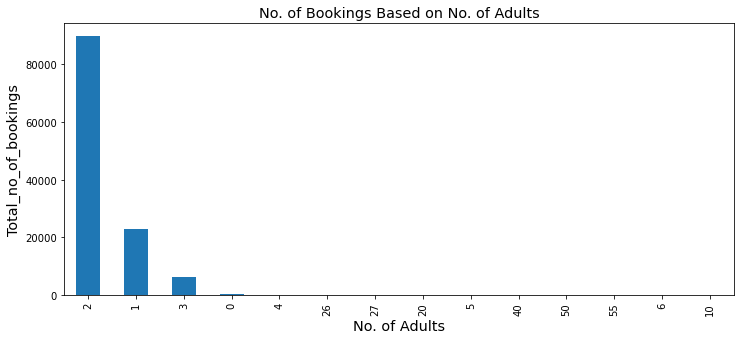

In [43]:
booking_data['adults'].value_counts().plot(kind = 'bar', figsize=(12,5))
plt.title('No. of Bookings Based on No. of Adults',fontdict={'fontsize':'x-large'})
plt.xlabel('No. of Adults',fontdict={'fontsize':'x-large'})
plt.ylabel('Total_no_of_bookings',fontdict={'fontsize':'x-large'})
plt.show()

**Observation :**
- No. of booking is maxilum when there are two adults.

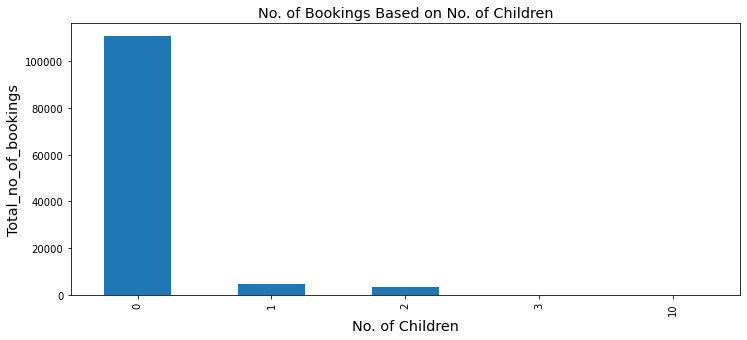

In [46]:
booking_data['children'].value_counts().plot(kind='bar', figsize=(12,5))
plt.title('No. of Bookings Based on No. of Children',fontdict={'fontsize':'x-large'})
plt.xlabel('No. of Children',fontdict={'fontsize':'x-large'})
plt.ylabel('Total_no_of_bookings',fontdict={'fontsize':'x-large'})
plt.show()

**Observation :**
- Maximum no of booking happens when there is no children.

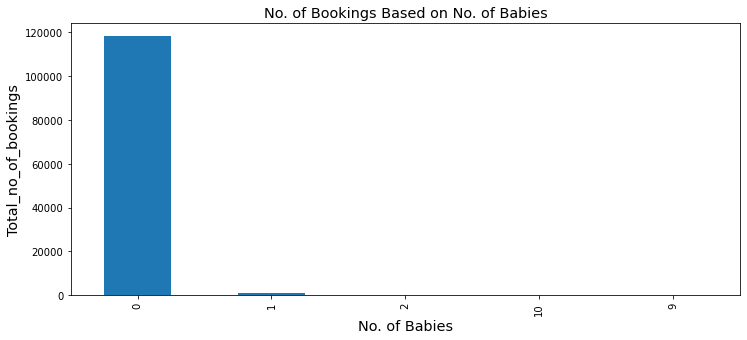

In [47]:
booking_data['babies'].value_counts().plot(kind='bar', figsize=(12,5))
plt.title('No. of Bookings Based on No. of Babies',fontdict={'fontsize':'x-large'})
plt.xlabel('No. of Babies',fontdict={'fontsize':'x-large'})
plt.ylabel('Total_no_of_bookings',fontdict={'fontsize':'x-large'})
plt.show()

**Observation :**
- Very similarly to children, maximum no. of bookings happen when no. of babies is 0.

## Booking and Cancellation Trend Across the Years:

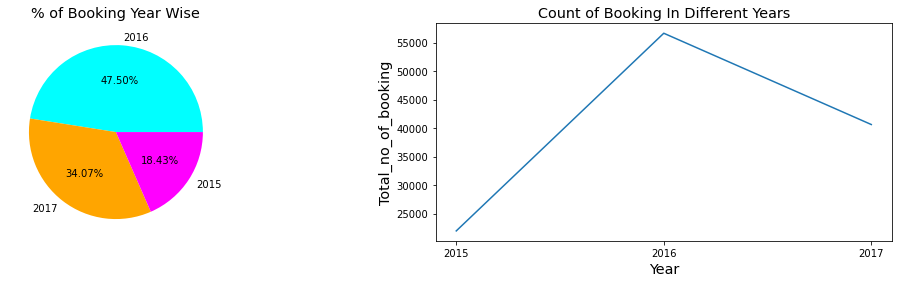

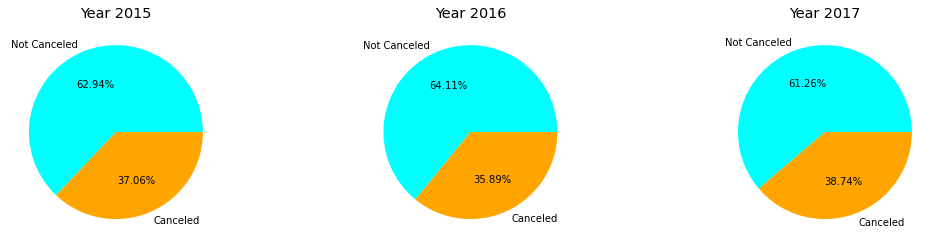

In [48]:
plt.subplots(1,2,figsize=(18,4))
plt.subplot(1,2,1)
plt.pie(booking_data['arrival_date_year'].value_counts(),labels=booking_data['arrival_date_year'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange','magenta'])
plt.title('% of Booking Year Wise',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
years = ['2015','2016','2017']
year_wise_booking = pd.DataFrame([(year, booking_data['arrival_date_year'].value_counts()[int(year)]) for year in years], columns=['Year','No_of_Booking'])
sns.lineplot(x='Year', y='No_of_Booking', data=year_wise_booking)
plt.title('Count of Booking In Different Years',fontdict={'fontsize':'x-large'})
plt.xlabel('Year',fontdict={'fontsize':'x-large'})
plt.ylabel('Total_no_of_booking',fontdict={'fontsize':'x-large'})

plt.subplots(1,3,figsize=(18,4),)
plt.subplot(1,3,1)
plt.pie(booking_data[booking_data['arrival_date_year']==2015]['is_canceled'].value_counts(),labels=['Not Canceled','Canceled'],autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Year 2015',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,2)
plt.pie(booking_data[booking_data['arrival_date_year']==2016]['is_canceled'].value_counts(),labels=['Not Canceled','Canceled'],autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Year 2016',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,3)
plt.pie(booking_data[booking_data['arrival_date_year']==2017]['is_canceled'].value_counts(),labels=['Not Canceled','Canceled'],autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Year 2017',fontdict={'fontsize':'x-large'})

plt.show()

**Observations :**
- Year 2016 has experienced the maximum bookings.
- In 2017 the no. of bookings decreased but not as less as 2015.
- Rate of cancellation decreased in 2016 from 2015 but it got a surge again in 2017.

## Seasonality in Booking :

In [49]:
non_canceled_booking = booking_data[booking_data['is_canceled']==0]

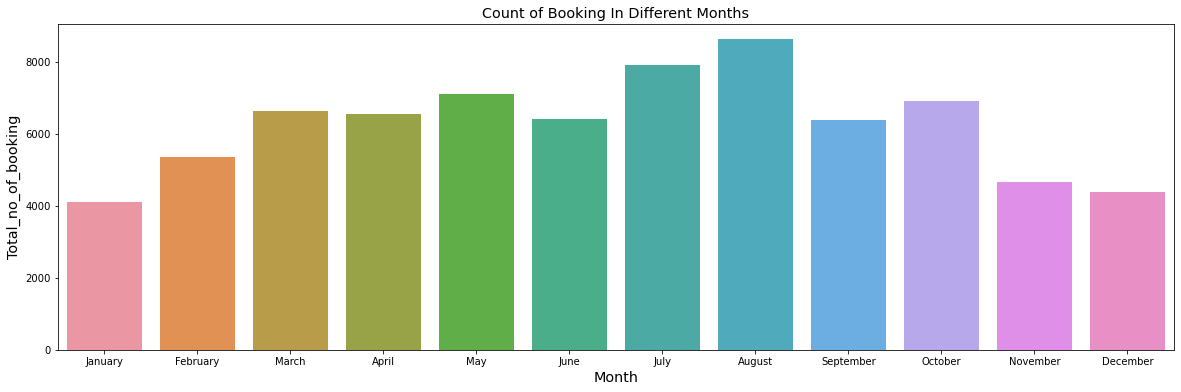

In [50]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_wise_booking = pd.DataFrame([(month, non_canceled_booking['arrival_date_month'].value_counts()[month]) for month in months], columns=['Month','No_of_Booking'])
plt.figure(figsize=(20,6))
sns.barplot(x='Month', y='No_of_Booking', data=month_wise_booking)
plt.title('Count of Booking In Different Months',fontdict={'fontsize':'x-large'})
plt.xlabel('Month',fontdict={'fontsize':'x-large'})
plt.ylabel('Total_no_of_booking',fontdict={'fontsize':'x-large'})
plt.show()

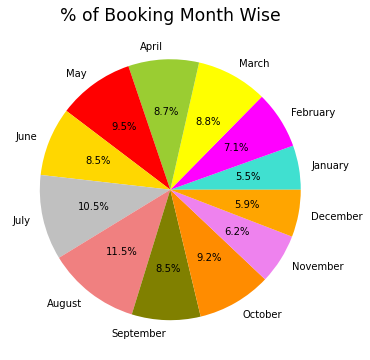

In [51]:
color=['turquoise','magenta','yellow','yellowgreen','red','gold','silver','lightcoral','olive','darkorange','violet','orange']
plt.figure(figsize=(8,6))
plt.pie(month_wise_booking['No_of_Booking'],autopct='%0.1f%%',labels=month_wise_booking['Month'].to_list(),colors=color)
plt.title('% of Booking Month Wise',fontdict={'fontsize':'xx-large'})
plt.show()

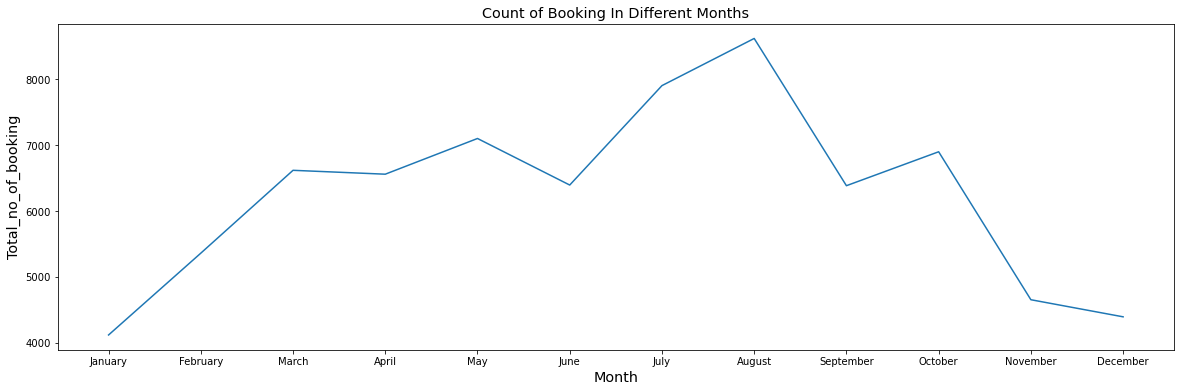

In [52]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Month', y='No_of_Booking', data=month_wise_booking)
plt.title('Count of Booking In Different Months',fontdict={'fontsize':'x-large'})
plt.xlabel('Month',fontdict={'fontsize':'x-large'})
plt.ylabel('Total_no_of_booking',fontdict={'fontsize':'x-large'})
plt.show()

**Observations :**
- The % of booking gradually increased from January till May and again it startd increasing from from July after facing a downturn in June.
- August saw a peak in booking, marking the highest demand month of the year.
- Again from October the % of booking started going downwards.
- The month January had the least no. of bookings.

## Distribution of Stay Across Hotel:

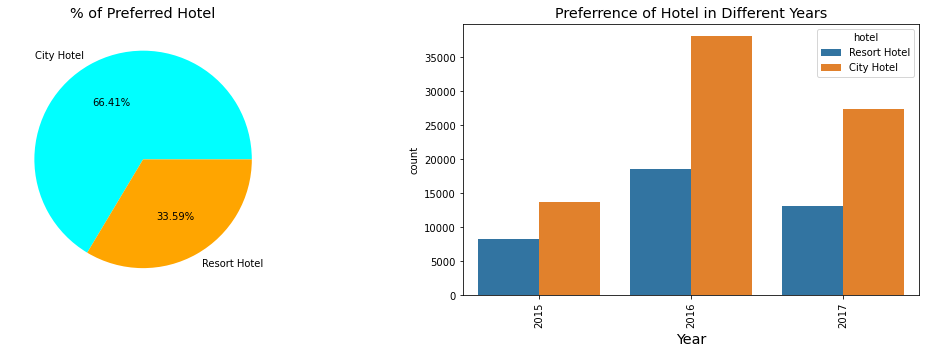

In [53]:
plt.subplots(1,2,figsize=(18,5))

plt.subplot(1,2,1)
plt.pie(booking_data['hotel'].value_counts(),
        labels=booking_data['hotel'].value_counts().index,
        autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('% of Preferred Hotel',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
sns.countplot(x='arrival_date_year',data=booking_data,hue='hotel')
plt.title('Preferrence of Hotel in Different Years',fontdict={'fontsize':'x-large'})
plt.xlabel('Year',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.show()

**Observations :**
- It can be observed that people prefer to stay at "City Hotel" over "Resort Hotel".
- The trend of higher preference of "City Hotel" didn't change over the 3 years. 

## Waiting Time and Cancellation Trend For Each Type of Hotels :

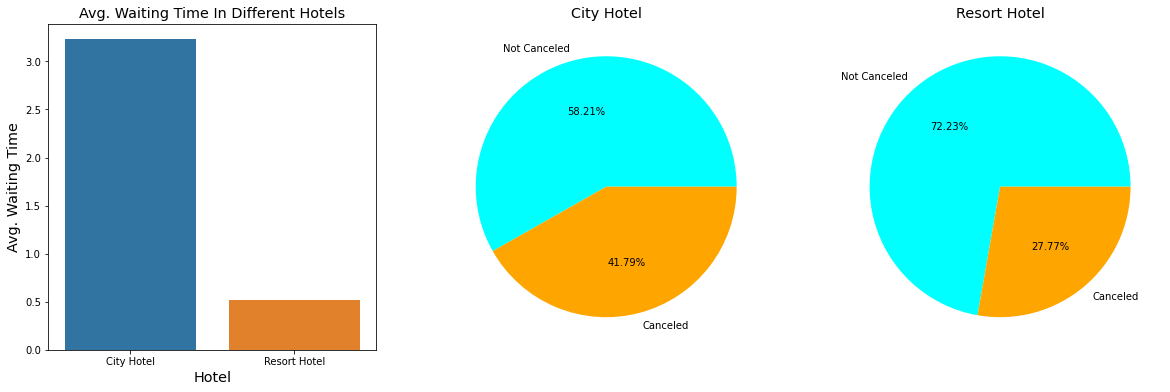

In [54]:
waiting_time = booking_data.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
plt.subplots(1,3,figsize=(20,6))
plt.subplot(1,3,1)
sns.barplot(x='hotel', y='days_in_waiting_list', data=waiting_time)
plt.title('Avg. Waiting Time In Different Hotels',fontdict={'fontsize':'x-large'})
plt.xlabel('Hotel',fontdict={'fontsize':'x-large'})
plt.ylabel('Avg. Waiting Time',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,2)
plt.pie(booking_data[booking_data['hotel']=='City Hotel']['is_canceled'].value_counts(),labels=['Not Canceled','Canceled'],autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('City Hotel',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,3)
plt.pie(booking_data[booking_data['hotel']=='Resort Hotel']['is_canceled'].value_counts(),labels=['Not Canceled','Canceled'],autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Resort Hotel',fontdict={'fontsize':'x-large'})


plt.show()

**Observations :**
- It is demonstrated in the pie plot that the % of cancellation in more for City Hotel compared to Resort Hotel.
- At the same time it can be oserved in the bar plot that waiting time for City Hotel is much higher compared to a Resort Hotel which very likely can cause a higher cancellation rate for the City Hotels.

## Overall % of Cancellation in The Entire Dataset :

Text(0.5, 1.0, '% of Cancellation')

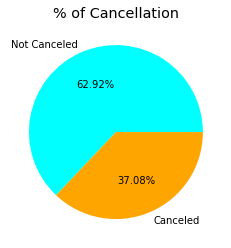

In [58]:
# plt.figure(figsize=())
plt.pie(booking_data['is_canceled'].value_counts(),
        labels=['Not Canceled','Canceled'],
        autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('% of Cancellation',fontdict={'fontsize':'x-large'})

**Observations :**
- For this project "is_canceled" is the target variable and from the above plot it can be said that the given dataset is balanced.

## Cancellation Pattern Based on Previous Cancellation Record:

In [55]:
booking_data['previous_cancellations'].value_counts()

0     112730
1       6048
2        114
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [56]:
booking_data.groupby('previous_cancellations')['is_canceled'].value_counts()

previous_cancellations  is_canceled
0                       0              74471
                        1              38259
1                       1               5712
                        0                336
2                       0                 76
                        1                 38
3                       0                 45
                        1                 20
4                       0                 24
                        1                  7
5                       0                 17
                        1                  2
6                       0                 15
                        1                  7
11                      0                 25
                        1                 10
13                      1                 11
                        0                  1
14                      1                 14
19                      1                 19
21                      1                  1
24                 

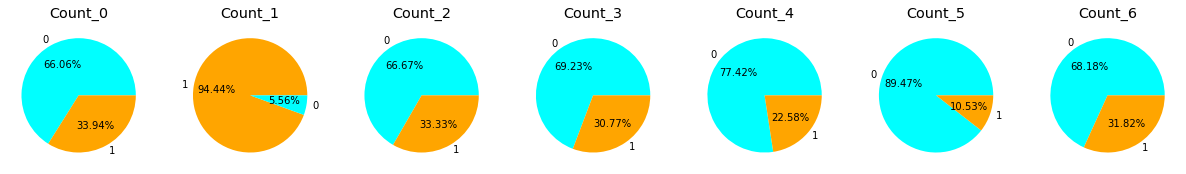

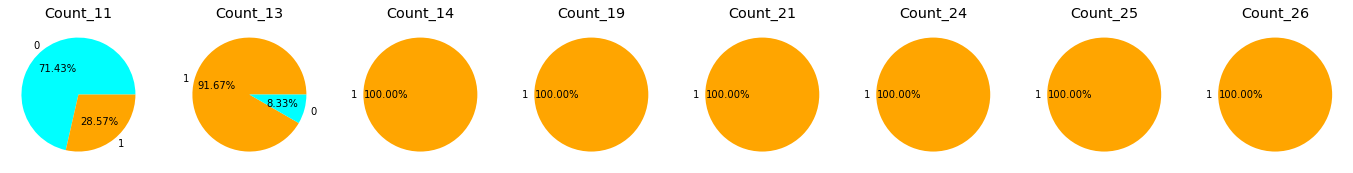

In [57]:
plt.subplots(1,7,figsize=(21,4))

plt.subplot(1,7,1)
plt.pie(booking_data[booking_data['previous_cancellations']==0]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==0]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Count_0',fontdict={'fontsize':'x-large'})

plt.subplot(1,7,2)
plt.pie(booking_data[booking_data['previous_cancellations']==1]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==1]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['orange','cyan'])
plt.title('Count_1',fontdict={'fontsize':'x-large'})

plt.subplot(1,7,3)
plt.pie(booking_data[booking_data['previous_cancellations']==2]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==2]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Count_2',fontdict={'fontsize':'x-large'})

plt.subplot(1,7,4)
plt.pie(booking_data[booking_data['previous_cancellations']==3]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==3]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Count_3',fontdict={'fontsize':'x-large'})

plt.subplot(1,7,5)
plt.pie(booking_data[booking_data['previous_cancellations']==4]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==4]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Count_4',fontdict={'fontsize':'x-large'})

plt.subplot(1,7,6)
plt.pie(booking_data[booking_data['previous_cancellations']==5]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==5]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Count_5',fontdict={'fontsize':'x-large'})

plt.subplot(1,7,7)
plt.pie(booking_data[booking_data['previous_cancellations']==6]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==6]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Count_6',fontdict={'fontsize':'x-large'})

plt.subplots(1,8,figsize=(24,4))

plt.subplot(1,8,1)
plt.pie(booking_data[booking_data['previous_cancellations']==11]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==11]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Count_11',fontdict={'fontsize':'x-large'})

plt.subplot(1,8,2)
plt.pie(booking_data[booking_data['previous_cancellations']==13]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==13]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['orange','cyan'])
plt.title('Count_13',fontdict={'fontsize':'x-large'})

plt.subplot(1,8,3)
plt.pie(booking_data[booking_data['previous_cancellations']==14]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==14]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['orange','cyan'])
plt.title('Count_14',fontdict={'fontsize':'x-large'})

plt.subplot(1,8,4)
plt.pie(booking_data[booking_data['previous_cancellations']==19]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==19]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['orange','cyan'])
plt.title('Count_19',fontdict={'fontsize':'x-large'})

plt.subplot(1,8,5)
plt.pie(booking_data[booking_data['previous_cancellations']==21]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==21]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['orange','cyan'])
plt.title('Count_21',fontdict={'fontsize':'x-large'})

plt.subplot(1,8,6)
plt.pie(booking_data[booking_data['previous_cancellations']==24]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==24]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['orange','cyan'])
plt.title('Count_24',fontdict={'fontsize':'x-large'})

plt.subplot(1,8,7)
plt.pie(booking_data[booking_data['previous_cancellations']==25]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==25]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['orange','cyan'])
plt.title('Count_25',fontdict={'fontsize':'x-large'})

plt.subplot(1,8,8)
plt.pie(booking_data[booking_data['previous_cancellations']==26]['is_canceled'].value_counts(),labels=booking_data[booking_data['previous_cancellations']==26]['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['orange','cyan'])
plt.title('Count_26',fontdict={'fontsize':'x-large'})

plt.show()

**Observations :**
- When the no_of_previous_cancellation of a particular guest is >13, it is very obvious that the guest will cancel the current booking as well.
- Also when the no_of_previous_cancellation of a guest is either 1 or 13 the % of cancelling the current booking is very high, greater than 90%.

## Avg. Daily Rate (ADR) Trend Across Months:

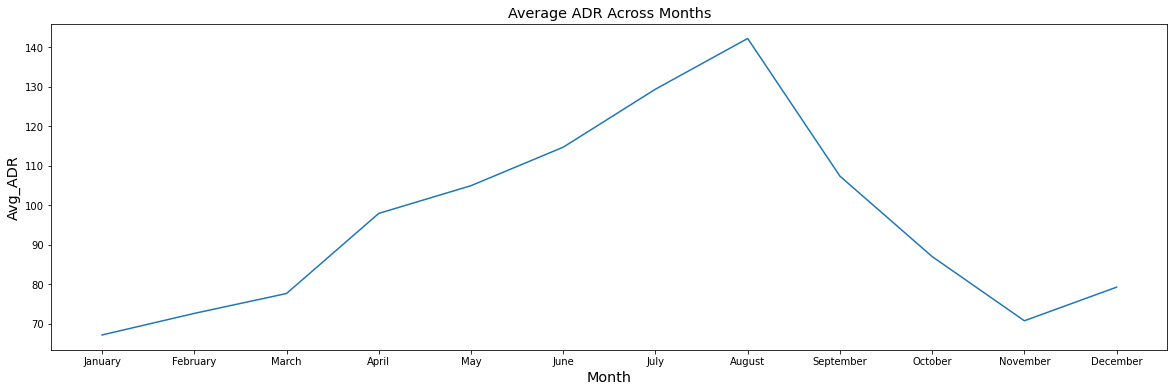

In [59]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_wise_avg_adr = pd.DataFrame([(month, non_canceled_booking.groupby('arrival_date_month')['adr'].mean()[month]) for month in months], columns=['Month','Avg_ADR'])
plt.figure(figsize=(20,6))
sns.lineplot(x='Month', y='Avg_ADR', data=month_wise_avg_adr)
plt.title('Average ADR Across Months',fontdict={'fontsize':'x-large'})
plt.xlabel('Month',fontdict={'fontsize':'x-large'})
plt.ylabel('Avg_ADR',fontdict={'fontsize':'x-large'})
plt.show()

**Observations :**
- ADR is maximum in August as August received the highest no. of bookings in a year.

## Average Daily Rate (ADR) Across Year:

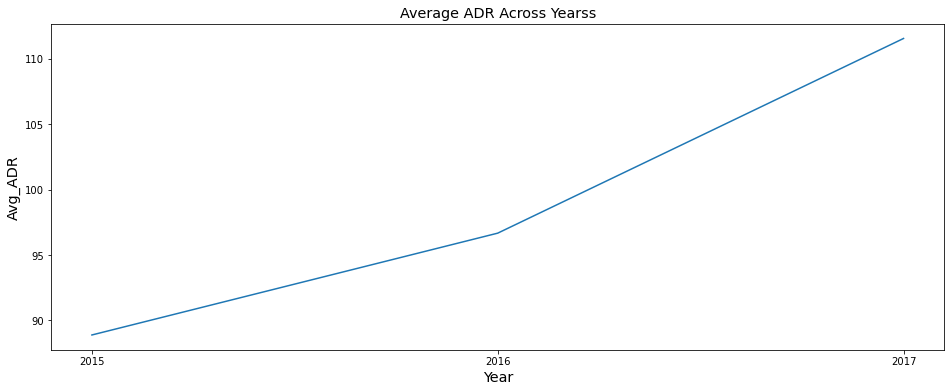

In [60]:
yearss = ['2015','2016','2017']
year_wise_avg_adr = pd.DataFrame([(year, non_canceled_booking.groupby('arrival_date_year')['adr'].mean()[int(year)]) for year in years], columns=['Year','Avg_ADR'])
plt.figure(figsize=(16,6))
sns.lineplot(x='Year', y='Avg_ADR', data=year_wise_avg_adr)
plt.title('Average ADR Across Yearss',fontdict={'fontsize':'x-large'})
plt.xlabel('Year',fontdict={'fontsize':'x-large'})
plt.ylabel('Avg_ADR',fontdict={'fontsize':'x-large'})
plt.show()

**Observation :**
- It can be seen that ADR has increased across the year.

## ADR Across Hotels:

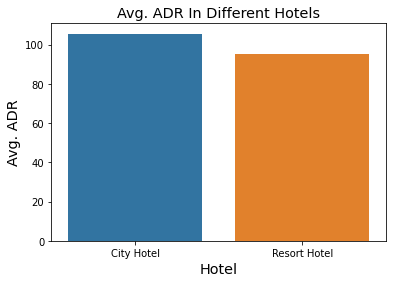

In [61]:
hotel_wise_adr = booking_data.groupby('hotel')['adr'].mean().reset_index()
sns.barplot(x='hotel', y='adr', data=hotel_wise_adr)
plt.title('Avg. ADR In Different Hotels',fontdict={'fontsize':'x-large'})
plt.xlabel('Hotel',fontdict={'fontsize':'x-large'})
plt.ylabel('Avg. ADR',fontdict={'fontsize':'x-large'})
plt.show()

**Observations :**
- ADR is higher for City Hotels compared to Resort Hotels as guests prefer to stay at City Hotel over Resort Hotel.

## Distribution Channel with Highest Booking Rate:

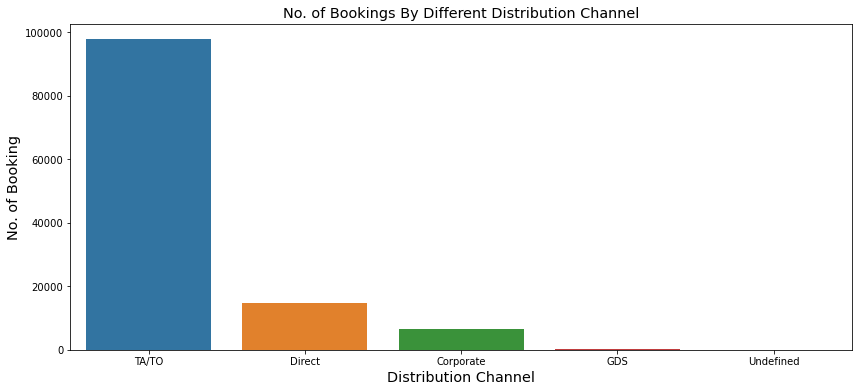

In [62]:
distribution_channel_wise_data = booking_data['distribution_channel'].value_counts().reset_index().rename(columns={'index':'Distribution_channel','distribution_channel':'Count'})
plt.figure(figsize=(14,6))
sns.barplot(x='Distribution_channel', y='Count', data=distribution_channel_wise_data)
plt.title('No. of Bookings By Different Distribution Channel',fontdict={'fontsize':'x-large'})
plt.xlabel('Distribution Channel',fontdict={'fontsize':'x-large'})
plt.ylabel('No. of Booking',fontdict={'fontsize':'x-large'})
plt.show()

## Distribution Channel With Highest Cancellation Rate:

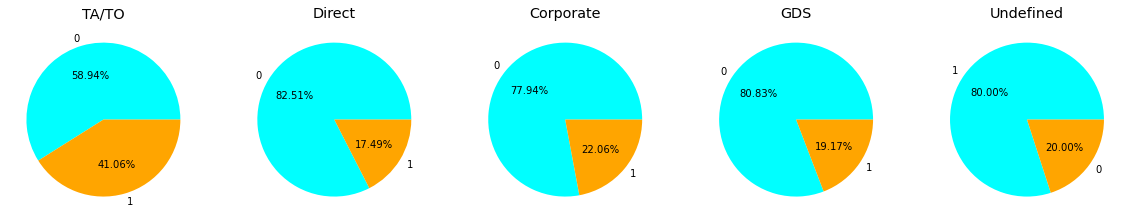

In [63]:
plt.subplots(1,5,figsize=(20,4))

plt.subplot(1,5,1)
plt.pie(booking_data[booking_data['distribution_channel']=='TA/TO']['is_canceled'].value_counts(),labels=booking_data[booking_data['distribution_channel']=='TA/TO']['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('TA/TO',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,2)
plt.pie(booking_data[booking_data['distribution_channel']=='Direct']['is_canceled'].value_counts(),labels=booking_data[booking_data['distribution_channel']=='Direct']['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Direct',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,3)
plt.pie(booking_data[booking_data['distribution_channel']=='Corporate']['is_canceled'].value_counts(),labels=booking_data[booking_data['distribution_channel']=='Corporate']['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Corporate',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,4)
plt.pie(booking_data[booking_data['distribution_channel']=='GDS']['is_canceled'].value_counts(),labels=booking_data[booking_data['distribution_channel']=='GDS']['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('GDS',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,5)
plt.pie(booking_data[booking_data['distribution_channel']=='Undefined']['is_canceled'].value_counts(),labels=booking_data[booking_data['distribution_channel']=='Undefined']['is_canceled'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('Undefined',fontdict={'fontsize':'x-large'})

plt.show()

**Observations :**
- Booking through 'Travel Agent(TA)' or 'Tour Operators(TO)' has both higher booking and higher Cancellation rates. 

## Percentage of Repeated Guests :

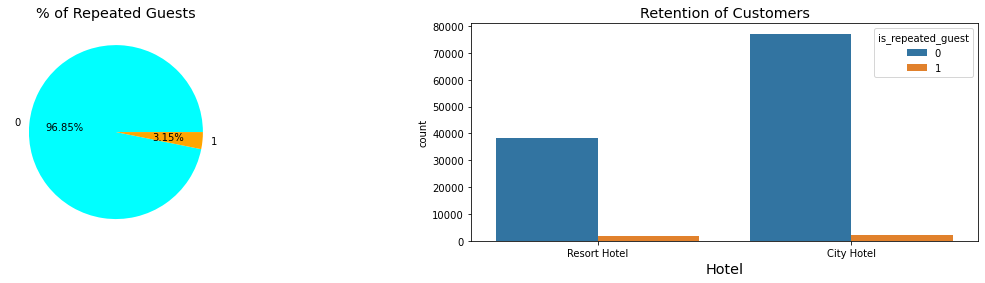

In [66]:
plt.subplots(1,2,figsize=(20,4))

plt.subplot(1,2,1)
plt.pie(booking_data['is_repeated_guest'].value_counts(),labels=booking_data['is_repeated_guest'].value_counts().index,autopct='%0.2f%%',colors=['cyan','orange'])
plt.title('% of Repeated Guests',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
sns.countplot(x='hotel',data=booking_data,hue='is_repeated_guest')
plt.title('Retention of Customers',fontdict={'fontsize':'x-large'})
plt.xlabel('Hotel',fontdict={'fontsize':'x-large'})

plt.show()

**Observation :**
- There is only 3.15% repeated customers.
- For both the types of hotel no_of_new_customer is more.

## Conclusion From EDA :

- Out of all the bookings 37% were cancelled.
- Most of the guests are from PTR followed by GBR and FRA.
- No. of booking is maximum when there is no children, babies and number of adults are 2.
- August was the busiest month of the year as no. of booking was highest.
- As result of that ADR is higher in August compared to other months of the year.
- The year 2016 received the maximum no of bookings(~64%).
- The cancellation rate was max in the year 2017 approximately 39%.
- But in the contrary ADR in 2017 is higher compare to 2015 and 2016.
- The guests prefer City Hotels over Resort Hotels and this trend has maintained across years.
- This results a higher ADR for City Hotels in comparison to Resort Hotels.
- The % of cancellation for City Hotels are higher almost 41% and the longer waiting time which is much higher than Resort Hotl can be a potential cause for this.
- Out of all the guests only 3.15% were repeated guests which indicates a low retension rate.
- Most of the bookings (~80%) has been done through Travel Agents/Travel Operators.
- Guests who has a record of cancelling more than 13 previous bookings has a very high probability of cancelling the current booking.

## Hypothesis Testing:

Here I have performed hypothesis testing on two statements.
1. "Customers booking more than 6 months in advance are more likely to cancel."
2. "Weekday bookings have a higher average daily rate than weekend bookings."

**Statement_1 : "Customers booking more than 6 months in advance are more likely to cancel."**
- H0: "Customers booking more than 6 months in advance are not likely to cancel booking."
- H1: "Customers booking more than 6 months in advance are more likely to cancel booking."

- As both the variable are **Categorical** "Chi-Square Contingency" test has been used to test significant statistical relation between both the variables.

In [34]:
# Created a new feature "advanced_booking_category" to specify if 'lead_time > 6 months' or 'lead_time <= 6 months':
booking_data['advance_booking_category'] = booking_data['lead_time'].apply(lambda x:'> 6 months' if x>180 else '< 6 months')

# Created a Contingency Table that display Count of 'Cancelled' and 'Not_Cancelled' for each group :
table_for_test = pd.crosstab(booking_data['advance_booking_category'], booking_data['is_canceled'])
table_for_test

is_canceled                   0      1
advance_booking_category              
< 6 months                64401  30128
> 6 months                10609  14071

In [68]:
# Chi-Square Contingency Test :
chi2, p, dof, ex = st.chi2_contingency(table_for_test, correction=False)
print(f'p-value of the test : {p}')

p-value of the test : 0.0


**Conclusion :**
- p-value = 0 indicated that the two features/variable **'advance_booking_category'** and **'is_canceled'** are highly statistically significant and we can reject the null hypothesis.
- The conclusion of the above hypothesis test is that **"Customers booking more than 6 months in advance are more likely to cancle the booking."**

**Statement_2: "Weekday bookings have a higher average daily rate than weekend bookings."**
- H0: "Weekday bookings and Weekend Bookings have same average daily rate"
- H1: "Weekday bookings have a higher average daily rate than weekend bookings."

- Here we need to compare mean of 'ADR' between two features "Weekday_booking" and "Weekend_booking".
- In this case we can apply **Two Sample t-Test** or **Independent t-test** if both the features are normally distributed or we can apply **Mann-Whitney U Test** of any one of the features are not normally distributed.
- To test Normal Distribution of Features **"Shapiro-Wilk"** test has been applied.

In [69]:
# Applying Filter to select Weekdays Data:
weekday_booking = booking_data[booking_data['stays_in_week_nights'] != 0]

# Applying Filter to select Weekend Data:
weekend_booking = booking_data[booking_data['stays_in_weekend_nights'] != 0]

In [70]:
# Checking if 'adr' is normally distributed for Weekday Data:
st.shapiro(weekday_booking['adr'])

ShapiroResult(statistic=0.8554304838180542, pvalue=0.0)

- As p-value = 0.0 we can say the value of 'ADR' is normally distributed for Weekday Data.

In [71]:
# Checking if 'adr' is normally distributed for Weekend Data:
st.shapiro(weekend_booking['adr'])

ShapiroResult(statistic=0.9370667934417725, pvalue=0.0)

- As p-value = 0.0 we can say the value of 'ADR' is normally distributed for Weekend Data as well.

- As the Variable 'ADR' is normally distributed for both Weekday and Weekend data we will apply **Two Sample t-Test** 

In [72]:
# Two Sample t-Test or Independent t-Test :
st.ttest_ind(weekday_booking['adr'],weekend_booking['adr'])

Ttest_indResult(statistic=-7.831327260107909, pvalue=4.853716371064553e-15)

- p-value is much lower than 0.05 (Value of Significance). 
- So we can reject the null hypothesis and the conclusion from the above hypothesis tet is **"Weekday Booking have a higher average daily rate than Weekend Bookings."**

## Model Building:

In [36]:
booking_data_final = booking_data.copy()
booking_data_final.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2         0       0   
1                        0                     0       2         0       0   
2                        0                     1       1         0       0   
3                        0                     1       1         0       0   
4                        0                     2       2         0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  \
0                  C                3   No Deposit      0   
1                  C                4   No Deposit      0   
2                  C                0   No Deposit      0   
3                  A                0   No Deposit    304   
4                  A                0   No Deposit    240   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

   total_guests advance_booking_category  
0             2               > 6 months  
1             2               > 6 months  
2             1               < 6 months  
3             1               < 6 months  
4             2               < 6 months

In [37]:
booking_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119209 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119209 non-null  object        
 1   is_canceled                     119209 non-null  int64         
 2   lead_time                       119209 non-null  int64         
 3   arrival_date_year               119209 non-null  int64         
 4   arrival_date_month              119209 non-null  object        
 5   arrival_date_week_number        119209 non-null  int64         
 6   arrival_date_day_of_month       119209 non-null  int64         
 7   stays_in_weekend_nights         119209 non-null  int64         
 8   stays_in_week_nights            119209 non-null  int64         
 9   adults                          119209 non-null  int64         
 10  children                        119209 non-null  int64  

- The feature 'Reservation_status_date' is not significant for model building and we already have 'Reservation_status' feature to give information about the final status.
- We will drop this feature.

In [38]:
booking_data_final = booking_data_final.drop('reservation_status_date',axis=1)
booking_data_final.shape

(119209, 32)

## Encoding:

In [78]:
for col in booking_data.select_dtypes(include='object').columns:
    print('*'*50,col,'*'*50)
    print(booking_data[col].unique())
    print()

************************************************** hotel **************************************************
['Resort Hotel' 'City Hotel']

************************************************** arrival_date_month **************************************************
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

************************************************** meal **************************************************
['BB' 'FB' 'HB' 'SC' 'Undefined']

************************************************** country **************************************************
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'OTHERS' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 

- Only two features **"Hotel"** and **"advanced_booking_category"** has binary classes. So will apply **Label Encoding** for these two features.
- For rest of the categorical variables will apply **"One-Hot Encoding"**

In [39]:
booking_data_final['hotel'] = booking_data_final['hotel'].map({'City Hotel':0,'Resort Hotel':1})
booking_data_final['advance_booking_category'] = booking_data_final['advance_booking_category'].map({'> 6 months':0,'< 6 months':1})

In [90]:
column = booking_data_final.select_dtypes('O').columns
booking_data_final = pd.get_dummies(booking_data_final, columns=column, drop_first=True)
booking_data_final.shape

(119209, 250)

## Splitting Data into Dependent and Independent Variable:

In [147]:
X = booking_data_final.drop('is_canceled', axis=1)
Y = booking_data_final['is_canceled']

In [92]:
Y.value_counts(normalize=True)*100

0    62.923101
1    37.076899
Name: is_canceled, dtype: float64

- Dataset is balanced.

## Correlation Between All The Columns Of The Dataset :

In [93]:
corr_matrix=X.corr()
corr_matrix

hotel  lead_time  arrival_date_year  \
hotel                           1.000000  -0.075980          -0.035191   
lead_time                      -0.075980   1.000000           0.040326   
arrival_date_year              -0.035191   0.040326           1.000000   
arrival_date_week_number       -0.001227   0.127056          -0.540368   
arrival_date_day_of_month       0.001693   0.002315          -0.000108   
stays_in_weekend_nights         0.187789   0.085967           0.021664   
stays_in_week_nights            0.235939   0.166882           0.031186   
adults                          0.010569   0.117574           0.030264   
children                        0.044017  -0.037876           0.054713   
babies                          0.043387  -0.021003          -0.013192   
is_repeated_guest               0.052468  -0.123265           0.010227   
previous_cancellations          0.012262   0.086026          -0.119905   
previous_bookings_not_canceled  0.004452  -0.073609           0.029222   
booking_changes                 0.076568   0.002210           0.031389   
agent                           0.651286  -0.013127           0.056420   
days_in_waiting_list           -0.072724   0.170010          -0.056347   
adr                            -0.098499  -0.065004           0.198456   
required_car_parking_spaces     0.218966  -0.116622          -0.013809   
total_of_special_requests       0.043487  -0.095944           0.108618   
total_guests                    0.038762   0.070210           0.052780   
advance_booking_category        0.024011  -0.827756          -0.000891   
arrival_date_month_August       0.013168   0.058120          -0.041752   
arrival_date_month_December     0.028756  -0.069820          -0.203570   
arrival_date_month_February     0.028102  -0.141450           0.137398   
arrival_date_month_January      0.016509  -0.125712           0.149895   
arrival_date_month_July         0.018774   0.103870           0.021474   
arrival_date_month_June        -0.038614   0.071920           0.161437   
arrival_date_month_March        0.003365  -0.094587           0.147848   
arrival_date_month_May         -0.023703   0.042166           0.177283   
arrival_date_month_November     0.012309  -0.062764          -0.173990   
arrival_date_month_October     -0.011690   0.056972          -0.272664   
arrival_date_month_September   -0.026275   0.094954          -0.282477   
meal_FB                         0.105838   0.009646          -0.057997   
meal_HB                         0.173502   0.136380          -0.057937   
meal_SC                        -0.216920  -0.096426           0.128814   
meal_Undefined                  0.139918  -0.015613           0.007231   
country_AGO                    -0.031507  -0.041834           0.003956   
country_AIA                    -0.002060  -0.002821          -0.000641   
country_ALB                    -0.001825  -0.000065           0.000145   
country_AND                     0.006139  -0.004095           0.004495   
country_ARE                    -0.005267  -0.010781           0.005172   
country_ARG                    -0.006247  -0.014786           0.011629   
country_ARM                    -0.001490  -0.003640          -0.001812   
country_ASM                    -0.002060  -0.000409           0.003453   
country_ATA                    -0.002913  -0.003204           0.001989   
country_ATF                    -0.002060   0.000322           0.003453   
country_AUS                    -0.016699   0.011913           0.027688   
country_AUT                    -0.037171   0.013199           0.021006   
country_AZE                    -0.004032  -0.003792           0.003317   
country_BDI                     0.004072  -0.002117          -0.000641   
country_BEL                    -0.043352  -0.005882           0.035931   
country_BEN                    -0.003568   0.007975           0.003618   
country_BFA                    -0.002060  -0.002659          -0.000641   
country_BGD                    -0.00713

### Graphical Representation of Correlation Coefficients of different columns :

In [97]:
plt.figure(figsize=(24,24))
fig = px.imshow(corr_matrix, text_auto=True)
fig.show()
# sns.heatmap(corr_matrix)
# plt.show()

<Figure size 1728x1728 with 0 Axes>

### Handling Multicollinearity :

Because of the large dimention of the modified dataset, the heat map is illegible. So we will check manually.

In [108]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_corr = [col for col in upper.columns if any(upper[col] >= 0.8)]
len(high_corr)

6

In [96]:
high_corr

['total_guests',
 'distribution_channel_Direct',
 'assigned_room_type_E',
 'assigned_room_type_F',
 'assigned_room_type_G',
 'assigned_room_type_H']

**Observations :**
- There are 6 columns that has >80% collinearity.
- We will drop these columns.

In [148]:
X = X.drop(high_corr, axis=1)

In [149]:
X.shape

(119209, 243)

## Selecting Top 10 Most Important Features For Cancellation Prediction:

### Method 1 (Using 'SelectKBest') :

In [100]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [101]:
impfeature = SelectKBest(score_func=mutual_info_classif)
imp_feature = impfeature.fit(X,Y)
imp_feature

SelectKBest(score_func=<function mutual_info_classif at 0x0000025909D12700>)

In [102]:
df_score = pd.DataFrame(imp_feature.scores_)
df_columns = pd.DataFrame(X.columns)

feature_score = pd.concat([df_columns,df_score],axis=1)
feature_score.columns = ['Feature','Score']

best_features = feature_score.nlargest(10,'Score')
best_features

Feature     Score
241  reservation_status_Check-Out  0.670386
236       deposit_type_Non Refund  0.133321
14                          agent  0.081370
1                       lead_time  0.080131
16                            adr  0.079006
170                   country_PRT  0.059675
11         previous_cancellations  0.042502
18      total_of_special_requests  0.038910
19       advance_booking_category  0.032663
17    required_car_parking_spaces  0.027055

### Graphical Representation of Top 10 Most Important Features :

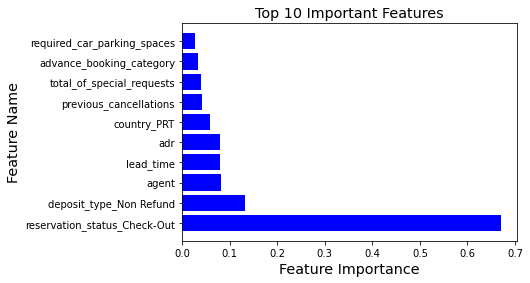

In [103]:
plt.barh(best_features['Feature'],best_features['Score'],color='b')
plt.title('Top 10 Important Features',fontdict={'fontsize':'x-large'})
plt.xlabel('Feature Importance',fontdict={'fontsize':'x-large'})
plt.ylabel('Feature Name',fontdict={'fontsize':'x-large'})
plt.show()

### Method 2 (Using Random Forest Method) :

In [104]:
from sklearn.ensemble import RandomForestClassifier

no_feature = 10
model = RandomForestClassifier()
model.fit(X,Y)
best_feature_index = np.argsort(model.feature_importances_)[::-1][0:no_feature]

best_feature = X.columns[best_feature_index]
best_feature

Index(['reservation_status_Check-Out', 'deposit_type_Non Refund',
       'country_PRT', 'lead_time', 'total_of_special_requests',
       'previous_cancellations', 'agent', 'adr', 'market_segment_Online TA',
       'required_car_parking_spaces'],
      dtype='object')

In [105]:
feature_importance = model.feature_importances_[best_feature_index]
feature_importance

array([0.57023764, 0.06210496, 0.04489809, 0.04251301, 0.02824581,
       0.02157342, 0.0163848 , 0.01607114, 0.01232853, 0.01146614])

In [106]:
Best_Features = pd.DataFrame(columns=['Feature','Importance'])
Best_Features['Feature'] = best_feature
Best_Features['Importance'] = feature_importance
Best_Features

Feature  Importance
0  reservation_status_Check-Out    0.570238
1       deposit_type_Non Refund    0.062105
2                   country_PRT    0.044898
3                     lead_time    0.042513
4     total_of_special_requests    0.028246
5        previous_cancellations    0.021573
6                         agent    0.016385
7                           adr    0.016071
8      market_segment_Online TA    0.012329
9   required_car_parking_spaces    0.011466

### Graphical Representation of Top 10 Most Important Features :

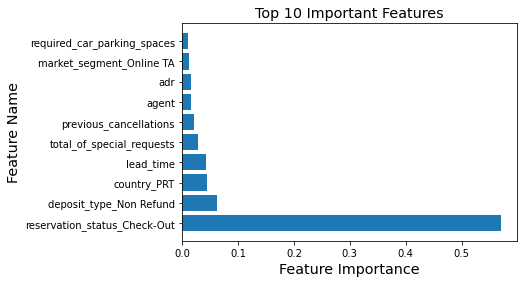

In [107]:
plt.barh(best_feature,feature_importance)
plt.title('Top 10 Important Features',fontdict={'fontsize':'x-large'})
plt.xlabel('Feature Importance',fontdict={'fontsize':'x-large'})
plt.ylabel('Feature Name',fontdict={'fontsize':'x-large'})
plt.show()

**Observation :**
- We have calculated Feature Importance using two different methods.
- Some of the common important feature that is present in output of both the methods are:
    - reservation_status_check_out
    - deposit_type_non_refund
    - adr
    - agent
    - lead_time
    - country_PRT
    - total_of_special_requirements
    - previous_cancellation
    - required_car_parking_spaces

## Scaling :

Values of few of the numerical features are spread over a wide range. To avoid biasness for higher values for variables like 'agent' and many more, scaling method has been applied on the features. 

In [150]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_Scaled = scale.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled,columns=X.columns)
X_Scaled.head()

hotel  lead_time  arrival_date_year  arrival_date_week_number  \
0    1.0   0.464043                0.0                       0.5   
1    1.0   1.000000                0.0                       0.5   
2    1.0   0.009498                0.0                       0.5   
3    1.0   0.017639                0.0                       0.5   
4    1.0   0.018996                0.0                       0.5   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                        0.0                      0.0                  0.00   
1                        0.0                      0.0                  0.00   
2                        0.0                      0.0                  0.02   
3                        0.0                      0.0                  0.02   
4                        0.0                      0.0                  0.04   

     adults  children  babies  is_repeated_guest  previous_cancellations  \
0  0.036364       0.0     0.0                0.0                     0.0   
1  0.036364       0.0     0.0                0.0                     0.0   
2  0.018182       0.0     0.0                0.0                     0.0   
3  0.018182       0.0     0.0                0.0                     0.0   
4  0.036364       0.0     0.0                0.0                     0.0   

   previous_bookings_not_canceled  booking_changes     agent  \
0                             0.0         0.166667  0.000000   
1                             0.0         0.222222  0.000000   
2                             0.0         0.000000  0.000000   
3                             0.0         0.000000  0.568224   
4                             0.0         0.000000  0.448598   

   days_in_waiting_list       adr  required_car_parking_spaces  \
0                   0.0  0.000000                          0.0   
1                   0.0  0.000000                          0.0   
2                   0.0  0.013889                          0.0   
3                   0.0  0.013889                          0.0   
4                   0.0  0.018148                          0.0   

   total_of_special_requests  advance_booking_category  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       1.0   
3                        0.0                       1.0   
4                        0.2                       1.0   

   arrival_date_month_August  arrival_date_month_December  \
0                        0.0                          0.0   
1                        0.0                          0.0   
2                        0.0                          0.0   
3                        0.0                          0.0   
4                        0.0                          0.0   

   arrival_date_month_February  arrival_date_month_January  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   

   arrival_date_month_July  arrival_date_month_June  arrival_date_month_March  \
0                      1.0                      0.0                       0.0   
1                      1.0                      0.0                       0.0   
2                      1.0                      0.0                       0.0   
3                      1.0                      0.0                       0.0   
4                      1.0                      0.0                       0.0   

   arrival_date_month_May  arrival_date_month_November  \
0                     0.0                          0.0   
1                     0.0                          0.0   
2                     0.0                          0.0   
3                     0.0                          0.0   
4             

## Model Building :

### Import Algorithms and Performance Parameters :

In [144]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,cross_val_predict,StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,precision_recall_fscore_support
from sklearn.metrics import roc_curve,auc

In [145]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
Bag = BaggingClassifier()
ADA = AdaBoostClassifier()
GB = GradientBoostingClassifier()
XGB = XGBClassifier()

### Probable Model Selection :

### Using Stratified Shuffle Split and Cross Validation Approach :

In [151]:
models = [LR, DT, RF, Bag, ADA, GB, XGB]

model_name = ['Logistioc Regression','Decision Tree','Random Forest Classifier',
              'Bagging Classifier','AdaBoost Classifier','Gradient Boosting','XGBoost Classifier']
model_accuracy = []
model_roc_auc = []
model_precision = []
model_recall = []
model_f1 = []

for model in models:
    print('*'*65)
    print(f'Performance of {model}')
    print('*'*65)
    CV = StratifiedShuffleSplit(n_splits=10,test_size=0.20,random_state=100)
    Scoring = ['accuracy','roc_auc','f1_macro','precision_macro','recall_macro']
    cross_val_scores = cross_validate(model,X_Scaled,Y,scoring=Scoring,cv=CV)
    
    # Calculation of Performance Metrics
    accuracy_test_cv = round(cross_val_scores['test_accuracy'].mean(),4)
    roc_auc_test_cv = round(cross_val_scores['test_roc_auc'].mean(),4)
    f1_test_cv = round(cross_val_scores['test_f1_macro'].mean(),4)
    precision_test_cv = round(cross_val_scores['test_precision_macro'].mean(),4)
    recall_test_cv = round(cross_val_scores['test_recall_macro'].mean(),4)
    
    # Appending To Performance List
    model_accuracy.append(accuracy_test_cv)
    model_roc_auc.append(roc_auc_test_cv)
    model_f1.append(f1_test_cv)
    model_precision.append(precision_test_cv)
    model_recall.append(recall_test_cv)
    
    # Print Performance Metrics
    print(f'Accuracy : {accuracy_test_cv}')
    print(f'ROC_AUC : {roc_auc_test_cv}')
    print(f'F1 MACRO : {f1_test_cv}')
    print(f'PRECISION MACRO : {precision_test_cv}')
    print(f'RECALL MACRO : {recall_test_cv}')

*****************************************************************
Performance of LogisticRegression()
*****************************************************************
Accuracy : 1.0
ROC_AUC : 1.0
F1 MACRO : 1.0
PRECISION MACRO : 1.0
RECALL MACRO : 1.0
*****************************************************************
Performance of DecisionTreeClassifier()
*****************************************************************
Accuracy : 1.0
ROC_AUC : 1.0
F1 MACRO : 1.0
PRECISION MACRO : 1.0
RECALL MACRO : 1.0
*****************************************************************
Performance of RandomForestClassifier()
*****************************************************************
Accuracy : 1.0
ROC_AUC : 1.0
F1 MACRO : 1.0
PRECISION MACRO : 1.0
RECALL MACRO : 1.0
*****************************************************************
Performance of BaggingClassifier()
*****************************************************************
Accuracy : 1.0
ROC_AUC : 1.0
F1 MACRO : 1.0
PRECISION MACRO : 1.0


In [152]:
Model_Performance = pd.DataFrame(zip(model_name,model_accuracy,model_roc_auc,model_f1,model_precision,model_recall),
                                 columns=['Model Name','Accuracy','ROC_AUC Score','F1 Score','Precision','Recall'])
Model_Performance

Model Name  Accuracy  ROC_AUC Score  F1 Score  Precision  \
0      Logistioc Regression       1.0            1.0       1.0        1.0   
1             Decision Tree       1.0            1.0       1.0        1.0   
2  Random Forest Classifier       1.0            1.0       1.0        1.0   
3        Bagging Classifier       1.0            1.0       1.0        1.0   
4       AdaBoost Classifier       1.0            1.0       1.0        1.0   
5         Gradient Boosting       1.0            1.0       1.0        1.0   
6        XGBoost Classifier       1.0            1.0       1.0        1.0   

   Recall  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  
5     1.0  
6     1.0

- As performance of all the models are same. 
- As value of all the evaluation parameter accurucay, precision, recall, F-1 Score is 100%, there might be overfitting problem.
- We will check the performance of models using Train-Test Split approach.

In [153]:
X_train,X_test,Y_train,Y_test = train_test_split(X_Scaled,Y,test_size=0.20,random_state=999,stratify=Y)

In [157]:
models = [LR,DT,RF,Bag,ADA,GB,XGB]

model_name = ['LR','Decision Tree','Random Forest Classifier','Bagging Classifier','AdaBoost Classifier','Gradient Boosting','XGBoost Classifier']
model_training_accuracy = []
model_test_accuracy = []
model_roc_auc = []
model_precision = []
model_recall = []
model_f1 = []

for model in models:
    print('*'*65)
    print(f'Performance of {model}')
    print('*'*65)
    # Train The Model
    fit_model = model.fit(X_train,Y_train)
    
    # Calculating Performance of Model
    Y_Pred_train = fit_model.predict(X_train)
    Y_Pred_test = fit_model.predict(X_test)
    training_accuracy = accuracy_score(Y_train,Y_Pred_train)
    test_accuracy = accuracy_score(Y_test,Y_Pred_test)
    roc_auc_value = roc_auc_score(Y_test,Y_Pred_test)
    precision,recall,f1_score,support = precision_recall_fscore_support(Y_test,Y_Pred_test, average="macro")
    
    # Appending To Performance List
    model_training_accuracy.append(training_accuracy)
    model_test_accuracy.append(test_accuracy)
    model_roc_auc.append(roc_auc_value)
    model_f1.append(f1_score)
    model_precision.append(precision)
    model_recall.append(recall)
    
    # Printing The Performance Parameters
    print(f'Training Accuracy Score : {accuracy_score(Y_train,Y_Pred_train)}')
    print(f'Testing Accuracy Score : {accuracy_score(Y_test,Y_Pred_test)}')
    print()
    # Printing Performance of Models Using Cross Validation
#     print('*'*60)
    print(f'Performance of {model} With Cross_Vallidation')
#     print('*'*60)
    for i in range(2,11):
        cv = cross_val_score(fit_model, X_Scaled, Y, cv=i)
        print(f'Accuracy with K value {i} is : {cv.mean()}')
    print()
    print(f'ROC_AUC Score : {roc_auc_score(Y_test,Y_Pred_test)}')
    print(f'Confusion Matrix :\n{confusion_matrix(Y_test,Y_Pred_test)}')
    print(f'Classification Report :\n{classification_report(Y_test,Y_Pred_test)}')
    print(f'MACRO Precision_Recall_F1 Score :\n{precision_recall_fscore_support(Y_test,Y_Pred_test, average="macro")}')
#     print(f'Important Features :\n{Best_Features}')

*****************************************************************
Performance of LogisticRegression()
*****************************************************************
Training Accuracy Score : 1.0
Testing Accuracy Score : 1.0

Performance of LogisticRegression() With Cross_Vallidation
Accuracy with K value 2 is : 1.0
Accuracy with K value 3 is : 1.0
Accuracy with K value 4 is : 1.0
Accuracy with K value 5 is : 1.0
Accuracy with K value 6 is : 1.0
Accuracy with K value 7 is : 1.0
Accuracy with K value 8 is : 1.0
Accuracy with K value 9 is : 1.0
Accuracy with K value 10 is : 1.0

ROC_AUC Score : 1.0
Confusion Matrix :
[[15002     0]
 [    0  8840]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15002
           1       1.00      1.00      1.00      8840

    accuracy                           1.00     23842
   macro avg       1.00      1.00      1.00     23842
weighted avg       1.00      1.00      1.00     

Accuracy with K value 2 is : 1.0
Accuracy with K value 3 is : 1.0
Accuracy with K value 4 is : 1.0
Accuracy with K value 5 is : 1.0
Accuracy with K value 6 is : 1.0
Accuracy with K value 7 is : 1.0
Accuracy with K value 8 is : 1.0
Accuracy with K value 9 is : 1.0
Accuracy with K value 10 is : 1.0

ROC_AUC Score : 1.0
Confusion Matrix :
[[15002     0]
 [    0  8840]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15002
           1       1.00      1.00      1.00      8840

    accuracy                           1.00     23842
   macro avg       1.00      1.00      1.00     23842
weighted avg       1.00      1.00      1.00     23842

MACRO Precision_Recall_F1 Score :
(1.0, 1.0, 1.0, None)


**Observations :**
- Here also the performance of all the models are same and value of all the evaluation parameter is 100%.
- From the result of Cross vallidation and training and testing accuracy we can say models are not overfit.

**Conclusion :**
- Here we will use Logistic Regression or Decision Tree models as they are less complex , less computationally expensive and highly interpretable, instead of using some highly complex and computationally expensive models like Random Forest, XGBoost etc.

## Final Model Selection:

### Logistic Regression :

**Performance of Model is as follows :**
1. Accuracy : 100%
2. ROC_AUC Score : 100%
3. Precision : 100%
4. Recall : 100%
5. F1 Score : 100%

ACCURACY SCORE : 1.0
ROC_AUC SCORE : 1.0
PRECISION : 1.0
RECALL : 1.0
F1 SCORE : 1.0

CONFUSION MATRIX :
[[15002     0]
 [    0  8840]]

CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15002
           1       1.00      1.00      1.00      8840

    accuracy                           1.00     23842
   macro avg       1.00      1.00      1.00     23842
weighted avg       1.00      1.00      1.00     23842




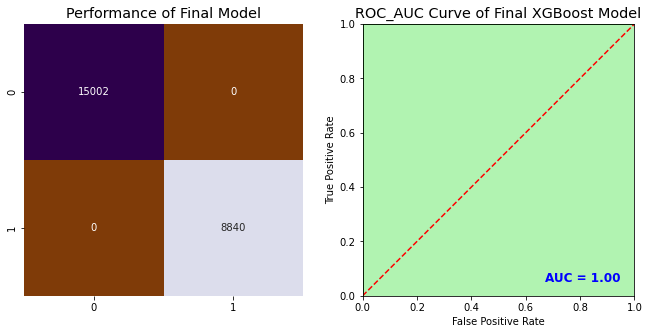

In [158]:
LR = LogisticRegression()
final_model = LR.fit(X_train,Y_train)
Y_Predict = final_model.predict(X_test)

Precision, Recall, F1_Score, Support = precision_recall_fscore_support(Y_test,Y_Predict, average='macro') 

fpr_final, tpr_final, threshold = roc_curve(Y_test, Y_Predict)
roc_auc_final = auc(fpr_final, tpr_final)

print(f'ACCURACY SCORE : {accuracy_score(Y_test,Y_Predict)}')
print(f'ROC_AUC SCORE : {roc_auc_score(Y_test,Y_Predict)}')
print(f'PRECISION : {Precision}')
print(f'RECALL : {Recall}')
print(f'F1 SCORE : {F1_Score}')
print()
print(f'CONFUSION MATRIX :\n{confusion_matrix(Y_test,Y_Predict)}')
print()
print(f'CLASSIFICATION REPORT :\n{classification_report(Y_test,Y_Predict)}')
print()

plt.subplots(1,2,figsize=(11,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Y_test,Y_Predict), annot=True, cbar=False, fmt='g',cmap='PuOr')
plt.title('Performance of Final Model',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr_final, tpr_final, 'g')
plt.fill_between(fpr_final, tpr_final, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % roc_auc_final, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC_AUC Curve of Final XGBoost Model',fontdict={'fontsize':'x-large'})

plt.show()

## Operational Insights :

- **1. Targeted Marketing :** Segment customers and tailor marketing campaign with incentives, loyalty programs and family packages.
- **2. Focus on Direct Booking :** Prioritize direct bookings and run seasonal campaigns to reduce dependencies on high-cancellation channels.
- **3. Operatonal Improvements :** Balance flexible cancellation policies with protective measures and proactively engage with long-load-time bookings.
- **4. Dynamic Pricing :** Implement a flexible pricing strategy based on demand, lead_time and guest loyalty.

## Conclusion :

    We have successfully train our model to predict cancellation of a booking with an accuracy 100%. We proceeded step by step analysing, cleaning and modelling the data. We have performed extensive Exploratory Data Analysis to find out the potential cause of increasing cancellation rate. Simultaneously we have applied various machine learning algorithm to achieve the desired result and finally we are able to build a model with a quiet good accuracy, precision and recall. 